# Звіт Коломійця Миколи К12 Варіан 79 Підгрупа Єфремова

# Imports

In [65]:
import networkx as nx
import numpy as np
import ast
import matplotlib.pyplot as plt

# Reading data

In [66]:
list_of_graph = []
graf_data = open('graf.txt')
for line in graf_data:
    list_of_graph.append(ast.literal_eval(line))
graf_data.close()

# Creating graph

In [67]:
G = nx.Graph()
G.add_nodes_from(list_of_graph[0])
G.add_edges_from(list_of_graph[1])

# Drawing graph

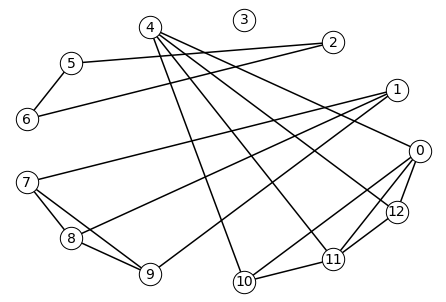

In [75]:
nx.draw_circular(G, node_color = 'white', node_size = 500, width = 1.5,
                 font_color = 'black', with_labels = True, linewidths = 1, edgecolors = 'black', font_size = 14)

# Drawing graph with ny own cords

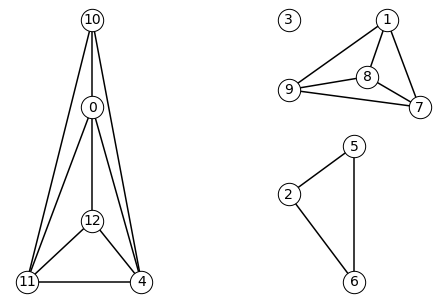

In [76]:
pos2 = {0: [0, 0], 1: [4.5, 1], 2: [3, -1],
       3: [3, 1], 4: [ 0.75, -2 ], 5: [ 4, -0.45], 
       6: [ 4, -2], 7: [5, 0], 8: [4.2,  0.35], 
       9: [3,  0.2], 10: [0, 1], 11: [-1 , -2], 
       12: [ 0, -1.3]}
nx.draw(G, with_labels = True, pos = pos2, node_color = 'white', node_size = 500, 
        font_color = 'black', width = 1.5, linewidths = 1, edgecolors = 'black', font_size = 14)

# Info about connected components

In [70]:
for i,g in enumerate(nx.connected_components(G)):
    list_of_edges = []
    G1 = nx.Graph()
    G1.add_nodes_from(g)
    for k in g:
        list_of_edges += G.edges(k)
    G1.add_edges_from(list_of_edges)
    print(f'{i+1}) Component \n','Nodes:', g, 'Number of nodes -', len(g))
    
    if list_of_edges == []:
        print(' Edges: there is no edges.')
    else: 
        print(' Edges:',list_of_edges, 'Number of edges -', len(list_of_edges))
    
    list_of_degrees = {}
    for p in g: 
        list_of_degrees[p] = nx.degree(G1,p)
    
    print(' Degree:', list_of_degrees)
    print(' Eccentricity:', nx.eccentricity(G1))
    print(' Radius:', nx.radius(G1))
    print(' Diameter:', nx.diameter(G1))

1) Component 
 Nodes: {0, 4, 10, 11, 12} Number of nodes - 5
 Edges: [(0, 4), (0, 12), (0, 11), (0, 10), (4, 0), (4, 10), (4, 12), (4, 11), (10, 0), (10, 4), (10, 11), (11, 0), (11, 4), (11, 10), (11, 12), (12, 0), (12, 4), (12, 11)] Number of edges - 18
 Degree: {0: 4, 4: 4, 10: 3, 11: 4, 12: 3}
 Eccentricity: {0: 1, 4: 1, 10: 2, 11: 1, 12: 2}
 Radius: 1
 Diameter: 2
2) Component 
 Nodes: {8, 1, 9, 7} Number of nodes - 4
 Edges: [(8, 1), (8, 7), (8, 9), (1, 9), (1, 8), (1, 7), (9, 1), (9, 7), (9, 8), (7, 1), (7, 8), (7, 9)] Number of edges - 12
 Degree: {8: 3, 1: 3, 9: 3, 7: 3}
 Eccentricity: {8: 1, 1: 1, 9: 1, 7: 1}
 Radius: 1
 Diameter: 1
3) Component 
 Nodes: {2, 5, 6} Number of nodes - 3
 Edges: [(2, 5), (2, 6), (5, 2), (5, 6), (6, 2), (6, 5)] Number of edges - 6
 Degree: {2: 2, 5: 2, 6: 2}
 Eccentricity: {2: 1, 5: 1, 6: 1}
 Radius: 1
 Diameter: 1
4) Component 
 Nodes: {3} Number of nodes - 1
 Edges: there is no edges.
 Degree: {3: 0}
 Eccentricity: {3: 0}
 Radius: 0
 Diameter: 0


# Example of the diametrs

1)component
[10, 0, 12]
2)component
[8, 7]
3)component
[2, 6]
4)component
  0


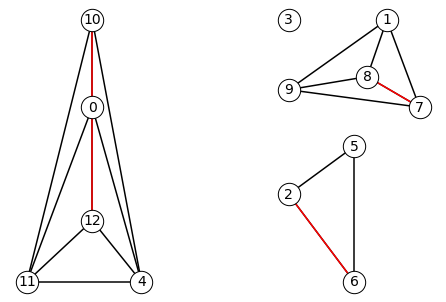

In [77]:
diametrs = []
not_trivial_components = 0

for i,g in enumerate(nx.connected_components(G)):
    print(f'{i+1})component')
    list_of_edges = []
    G1 = nx.Graph()
    G1.add_nodes_from(g)
    path = 0
    for k in g:
        list_of_edges += G.edges(k)
    G1.add_edges_from(list_of_edges)
    diametr = nx.diameter(G1)
    
    if not(len(g) == 1):
        not_trivial_components += 1
        s = nx.shortest_path(G1)
        h = 0
        for h in g:
            if not path:
                for l in g:
                    if len(s[h][l])-1 == diametr:
                        path = s[h][l]
                        
        diametrs.append(path)
        print(diametrs[i])
        
    elif len(g) == 1:
        print('  0')
        
nx.draw(G, with_labels = True, pos = pos2, node_color = 'white', node_size = 500, 
        font_color = 'black', linewidths = 1, width = 1.5, edgecolors = 'black', font_size = 14)
edge_list = []

for k in range(not_trivial_components):
    for i in range(len(diametrs[k])-1):
        edge_list.append((diametrs[k][i],diametrs[k][i+1]))
        
output = nx.draw_networkx_edges(G, pos = pos2, width = 1.5, edge_color = 'red', edgelist=edge_list)

# Finding subgraph without cycles

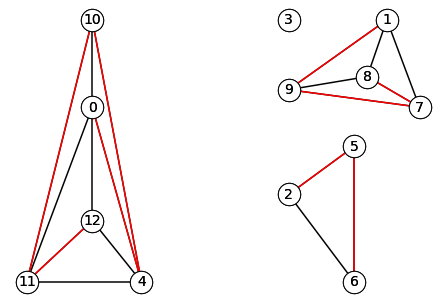

In [78]:
Go = nx.dfs_tree(G)
G2 = nx.Graph()
G2.add_nodes_from(Go.nodes)
G2.add_edges_from(Go.edges)
nx.draw(G, with_labels = True, pos = pos2, node_color = 'white', node_size = 500, 
        font_color = 'black', width = 1.5, linewidths = 1, edgecolors = 'black', font_size = 14)
nx.draw(G2, with_labels = True, pos = pos2, node_color = 'white', node_size = 500, 
        font_color = 'black', width = 1.5, linewidths = 1, edgecolors = 'black', font_size = 14,edge_color = 'r')